# CAPSTONE MODUL 3 : BANK MARKETING CAMPAIGN
created by Anastiara Adina Restu - JCDS 1702 002


## Problem Statement
Marketing campaign is a strategy to enhance business. One of the approach to sell the products/services is by telemarketing. Telemarketing is a marketing approach operationalized through a contact center. Representatives from the contact center will contact the customers by phone offer the products. The cost of telemarketing is variative, based on per hour or per lead. This approach is commonly done by banking service companies to offer their products, for example long-term deposit. To determine whether a campaign is successful or not is based on how many customers decide to subscribe the long-term deposit. 

However, if we talk about the cost of the telemarketing, sometimes it can be costly if the marketing team just call all the customers without knowing that they might be not interested to subscribe to the long-term deposit also waste time as well. Besides, this strategy makes the customers uncomfortable, especially the ones who don't want to subscribe to our product. To overcome with the campaign cost waste and customers' complaint, it is needed a prediction on how many customers are more likely to subscribe the deposit so we can calculate the campaign cost from the prediction.

## Objectives
To achieve the effiency of the telemarketing cost, we need to predict deposit subscription on our customers based on the available data. From the prediction, we can calculate the telemarketing cost before we do prediction and after the prediction.

## Dataset
The dataset is obtained from [this dataset](https://drive.google.com/file/d/1PQTTWgITANg5Av-1Ot28KCIHVyFaCmUK/view) about direct marketing campaigns of a Portuguese banking institution and based from [[1]](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset). In further analysis and modeling, the currency of this dataset will be explained in EUR.

## Analytic Approach
### Modeling
Before we do our modeling, we need to do data cleaning followed by EDA (explanatory data analysis) on our data to get insights about our customers details. Then, we split our data with train set 80% and test set 20%. Next, we will train and test our data with some machine model learning such as Decision Tree, Logistic Regression, KNN, Random Forest, AdaBoost, Gradient Boost, and XGB. After getting the top 3 best performance score from the benchmark models, we do hyperparameter tuning for each model to improve the model performance. Last, we then train and test our model alongside with the cost prediction to see what model predicts the most efficient marketing cost.

### Marketing Cost Calculation
To be able understand our prediction, we can use confusion matrix to explain the customers' category

![](2022-08-08-20-25-29.png)

TARGET :
- Positive class : 'yes' for subscribe deposit
- Negative class : 'no' for not subscribe deposit

Confusion Matrix term
- TP: number of customers who are **PREDICTED SUBSCRIBED** deposit are **ACTUALLY SUBSCRIBED**
- TN: number of customers who are **PREDICTED NOT SUBSCRIBED** deposit are **ACTUALLY NOT SUBSCRIBED**
- FP: number of customers who are **PREDICTED SUBSCRIBED** deposit is **ACTUALLY NOT SUBSCRIBED**
- FN: number of customers who are **PREDICTED NOT SUBSCRIBED** deposit is **ACTUALLY SUBSCRIBED**


In this case, the marketing team knows that [[2]](https://github.com/goncaloggomes/cost-prediction/blob/master/ML_fullproject_bankmktcampaign.ipynb):
- For each customer predicted subscribed to our deposit but actually they don't subscribe, the bank will cost 2000 EUR
- For each customer predicted not subscribed to our deposit but actually they subscribe, the bank will cost 500 EUR

Both cases have the consquence of wasting money and our goal will not be achieved. However, the consequences of False Positive will costly more. So, we will calculate those cases based on our prediction through confusion matrix from each model and try to reduce the FP numbers as low as possible in order to make the marketing cost more efficient (cheaper).

## Metrics Evaluation

There are two metrics in this case

1. ROC-AUC score: used to determine whether a model is good or not to distinguish positive class and negative class
2. Cost Reduction: used to determine a model is able to make the efficient cost. The higher cost reduction, the better performance model to make the efficient cost.

## Feature Description

**Bank client data:**

1. age: (numeric)
2. job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. housing: has housing loan? (categorical: 'no','yes','unknown')
4. loan: has personal loan? (categorical: 'no','yes','unknown')
5. balance: Balance of the individual.

**Related with the last contact of the current campaign:**

6. contact: contact communication type (categorical: 'cellular','telephone','unknown')
7. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

**Other attributes:**

8. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
9. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted))
10. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Output variable (desired target):**

11. deposit : as the client subscribed a term deposit? (binary: 'yes','no')



## Libraries

In [51]:
# Analytic and visualisation libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing and cross validation libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from category_encoders import OrdinalEncoder,BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modeling and metrics libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve,accuracy_score,precision_score

# Other
import warnings
warnings.filterwarnings("ignore")


## DATA CHECKING 

In this section, we well get to know our dataset so we can identify things that should be considered for the next analysis.

In [2]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [3]:
print(f"From the original dataset, we have {df.shape[0]} customers and {df.shape[1]} features. Later, we will see if we have to reduce the numbers of customers if some of them are outliers")

From the original dataset, we have 7813 customers and 11 features. Later, we will see if we have to reduce the numbers of customers if some of them are outliers


### Missing values

We also need to check if our dataset has missing values. This is important because these missing values will impact the step of data modeling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


Fortunately, we don't have missing values in our dataset. However, in the next step of data cleaning, we will also observe if we have outliers of each column.

### Duplicate Values
We need to check if there are duplicate values in our data

In [5]:
display(df[df.duplicated()])
print(f"There are {df.duplicated().sum()} duplicate values in our data. We will remove these duplicates")

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


There are 8 duplicate values in our data. We will remove these duplicates


In [6]:
df.drop_duplicates(inplace=True)
print(f"After dropping duplicates, we have {df.shape[0]} rows and {df.shape[1]} columns")

After dropping duplicates, we have 7805 rows and 11 columns


### Descriptive Statistics in General

In this part, we want to know what information that our data have. This could be used to idenfity if we have outliers or not in our data

In [7]:
display(df.describe(),df.describe(include='object'))

,age,balance,campaign,pdays
count,7805.000000,7805.000000,7805.000000,7805.000000
mean,41.257783,1513.968225,2.520564,51.462268
std,11.922833,3090.508938,2.728204,108.115084
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,128.000000,1.000000,-1.000000
50%,39.000000,550.000000,2.000000,-1.000000
75%,49.000000,1685.000000,3.000000,41.000000
max,95.000000,66653.000000,63.000000,854.000000


,job,housing,loan,contact,month,poutcome,deposit
count,7805,7805,7805,7805,7805,7805,7805
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1789,4136,6781,5623,1973,5811,4075


### Check Data Balance
In this step, we are going to figure out that our data is balanced or not by checking the data target deposit` feature. We will consider a data is balance based on its ratio of binary classes ('yes' and 'no')

,deposit,percentage(%)
0,no,52.21
1,yes,47.79


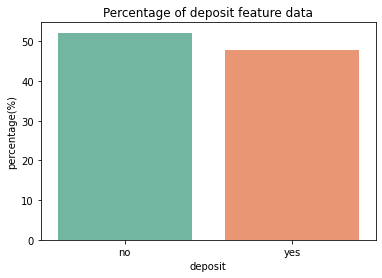

In [8]:
# check data balance
deposit_percent = pd.DataFrame(round(df['deposit'].value_counts()/len(df)*100,2)).reset_index().rename(columns={'index':'deposit','deposit':'percentage(%)'})
display(deposit_percent)

sns.barplot(y='percentage(%)',x='deposit',data=deposit_percent,palette='Set2')
plt.title("Percentage of deposit feature data")
plt.show()

It is shown that the negative class has more data than the positive class. By looking at the percentage of those two classes, we can tell that the ratio is pretty small. So, our dataset is balance based on data target.

After checking the descriptive statistics from the dataset, we can tell that:
1. The age of customers are from 18-95 years old. For future analysis and modeling, we will modify this feature into age categories
2. There are customers who have negative balance and the balance data has outliers. The possibility for future analysis and modeling is removing outliers from balance feature.
3. pdays feature has -1, we will replace this with 0 since it means that the customer never contacted before
4. There 12 jobs of customers in the dataset and the most frequent value is management
5. Most customers don't have house credit and loan
6. Customers are most contacted via cellular
7. Campaign are most performed in May
8. the outcome of the campaign is unknown, it is assumed as missing value and we will handle this later
9. Most of customers don't subscribe to our deposit product and it is proved after we check the deposit data and the ratio between the positive class ('yes') and negative class ('no') is 1.1, which means the ratio is very small.
10. Therefore, We conclude that our data target is balance.

From the report above, we will handle the outliers and modify data from some columns. To do this, we have to handle the outliers from balance column, modify age and pdays column. Next, we will also handle the "unknown" value from poutcome and last. We also will check on the correlation from numerical features.

## EXPLANATORY DATA ANALYSIS

## Numerical Features

### Feature : age

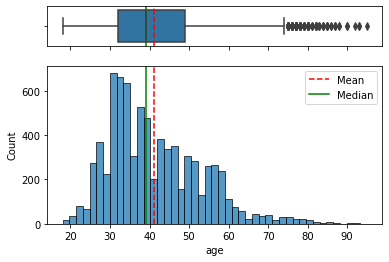

In [9]:
# Visualization of 'age'
age = df['age']
mean = np.array(age).mean()
median = np.median(age)

f,(ax_box,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(0.5,2)})

sns.boxplot(age, ax=ax_box)
ax_box.axvline(mean, color='r',linestyle='--')
ax_box.axvline(median, color='g',linestyle='-')

sns.histplot(data=df, x='age',ax=ax_hist)
ax_hist.axvline(mean, color='r',linestyle='--')
ax_hist.axvline(median, color='g',linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')

plt.show()

From the histogram above, it shows that **age** feature has not normal distribution and outliers. However, we don't have to remove the outliers from this feature because we want to see the variety of our customers' age. Instead, we will categorize the our age customers based on age generation such as :
- Gen Z = 18 - 25 years old
- Millenials = 26 - 41 years old
- Gen X = 42 - 57 years old
- Boomers = >57 years old

In [10]:
def age_group(x):
    if x>=18 and x<=25:
        return 'Gen Z'
    elif x>=26 and x<=41:
        return 'Millenials'
    elif x>=42 and x<=57:
        return 'Gen X'
    else:
        return 'Boomers'
age_group_final = df['age'].apply(age_group)
df.insert(1,'age_group',age_group_final)

,age_group,percentage (%)
0,Millenials,54.32
1,Gen X,31.62
2,Boomers,10.12
3,Gen Z,3.93


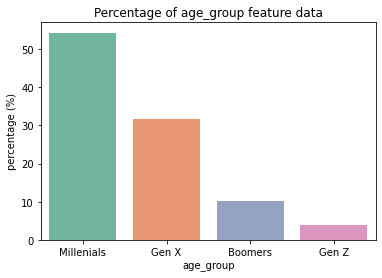

In [11]:
age_percent = pd.DataFrame(round(df['age_group'].value_counts()/len(df)*100,2)).reset_index().rename(columns={'index':'age_group','age_group':'percentage (%)'})
display(age_percent)


sns.barplot(y='percentage (%)',x='age_group',data=age_percent,palette='Set2')
plt.title("Percentage of age_group feature data")
plt.show()

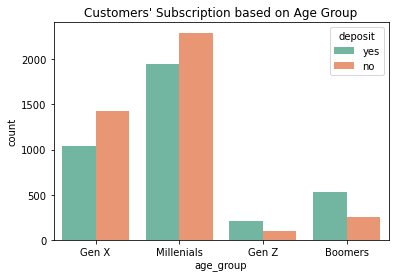

In [13]:
sns.countplot(data=df,x='age_group',hue='deposit',palette='Set2')
plt.title("Customers' Subscription based on Age Group");

From the bar plot above, we know that are most customers are from Milleanials group (26-41 years old) and the least customers are from Gen Z group (18-25 years old). However, we take a look at the second graph, Boomers and Gen Z customers have more customers to subscribe than not subscribe to the deposit. Millenials and Gen X have more customers to subscribe but the number of customers who don't subscribe even higher. So, we better also approach the boomers and Gen Z to get more customers to susbcribe the deposit product.

### Feature : balance

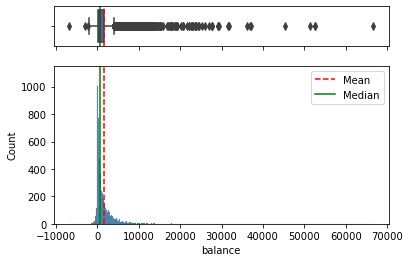

In [14]:
# Visualization of 'balance'
balance = df['balance']
mean = np.array(balance).mean()
median = np.median(balance)

f,(ax_box,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(0.5,2)})

sns.boxplot(balance, ax=ax_box)
ax_box.axvline(mean, color='r',linestyle='--')
ax_box.axvline(median, color='g',linestyle='-')

sns.histplot(data=df, x='balance',ax=ax_hist)
ax_hist.axvline(mean, color='r',linestyle='--')
ax_hist.axvline(median, color='g',linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')

plt.show()

From the histogram above, we can see that balance data is skewed, meaning that the balance data is not normal distributed and will have outliers. Here, we are going to check the outliers from the balance.

In [15]:
def outliers(x):
    q1 = x.quantile(q=0.25)
    q3 = x.quantile(q=0.75)

    iqr  = q3-q1

    upper = q3 + iqr*1.5
    lower = q1 - iqr*1.5

    return upper,lower

In [17]:
print(f"The Upper Fence value is {outliers(df['balance'])[0]} EUR and the lower fence value is {outliers(df['balance'])[1]} EUR")
print(f"The total of data outliers is {len(df[(df['balance']>=outliers(df['balance'])[0])|(df['balance']<=outliers(df['balance'])[1])])} data which means {round(len(df[(df['balance']>=outliers(df['balance'])[0])|(df['balance']<=outliers(df['balance'])[1])])/len(df)*100,2)}% of the dataset") 

The Upper Fence value is 4020.5 EUR and the lower fence value is -2207.5 EUR
The total of data outliers is 736 data which means 9.43% of the dataset


Because we only have 736 outliers of balance data, we will remove these outliers in order to get a better modeling result.

In [18]:
df= df[~((df['balance']>=outliers(df['balance'])[0])|(df['balance']<=outliers(df['balance'])[1]))]
df

,age,age_group,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,Gen X,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
2,51,Gen X,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,Millenials,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,Millenials,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,Millenials,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
7807,33,Millenials,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,Boomers,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7810,36,Millenials,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,Millenials,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [19]:
df['balance'].describe()

count    7069.000000
mean      801.763899
std       983.820911
min     -1965.000000
25%       100.000000
50%       443.000000
75%      1222.000000
max      4017.000000
Name: balance, dtype: float64

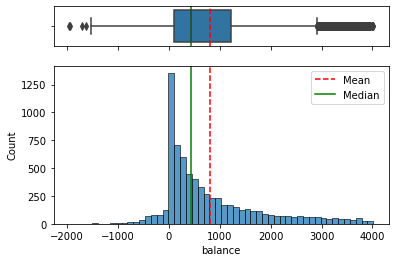

In [20]:
# Check the new Visualization of 'balance'
balance = df['balance']
mean = np.array(balance).mean()
median = np.median(balance)

f,(ax_box,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(0.5,2)})

sns.boxplot(balance, ax=ax_box)
ax_box.axvline(mean, color='r',linestyle='--')
ax_box.axvline(median, color='g',linestyle='-')

sns.histplot(data=df, x='balance',ax=ax_hist)
ax_hist.axvline(mean, color='r',linestyle='--')
ax_hist.axvline(median, color='g',linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')

plt.show()

We are still curious with the customers who have negative balance. To answer our curiosity, we will investigate these customers based on their poutcome and deposit features.

In [21]:
df_0=df[((df['balance']<0))]
display(len(df_0),df_0['poutcome'].value_counts(),df_0['deposit'].value_counts())

476

unknown    411
failure     44
other       14
success      7
Name: poutcome, dtype: int64

no     337
yes    139
Name: deposit, dtype: int64

Turns out, the customers who have negative balance don't have enough information about their poutcome because most of their status are `unknown` and their deposit status is `no`. So, we can remove these data as our effort to make our data more balance.

In [22]:
df = df[~((df['balance']<0))]
df

,age,age_group,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,Gen X,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
2,51,Gen X,admin.,3025,no,no,cellular,may,1,352,other,yes
4,36,Millenials,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
7,36,Millenials,technician,911,yes,yes,cellular,may,2,21,failure,yes
8,35,Millenials,management,805,no,no,cellular,sep,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
7807,33,Millenials,management,0,yes,yes,cellular,may,2,-1,unknown,no
7808,62,Boomers,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7810,36,Millenials,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,Millenials,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


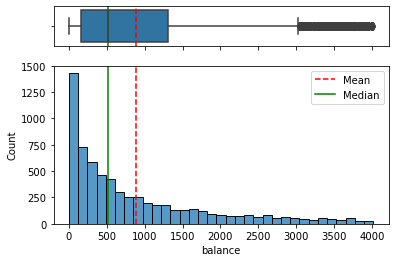

In [23]:
# Check the new Visualization of 'balance'
balance = df['balance']
mean = np.array(balance).mean()
median = np.median(balance)

f,(ax_box,ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(0.5,2)})

sns.boxplot(balance, ax=ax_box)
ax_box.axvline(mean, color='r',linestyle='--')
ax_box.axvline(median, color='g',linestyle='-')

sns.histplot(data=df, x='balance',ax=ax_hist)
ax_hist.axvline(mean, color='r',linestyle='--')
ax_hist.axvline(median, color='g',linestyle='-')

plt.legend({'Mean':mean,'Median':median})
ax_box.set(xlabel='')

plt.show()

Now, our balance data is range from 0 to around 4000 EUR

### Feature: pdays
Next, we wil check on data in pdays feature.

In [24]:
# Check the unique values and count the values from pdays
df['pdays'].value_counts()

-1      4872
 92       63
 91       57
 182      54
 183      51
        ... 
 555       1
 449       1
 776       1
 469       1
 155       1
Name: pdays, Length: 405, dtype: int64

From earlier description, we know that pdays = -1, meaning that a customer has not been contacted before. This value will be replaced as 0, to show that the customer is never contacted before.

In [25]:
# replace -1 with 0
df['pdays']=df['pdays'].replace({-1:0})
df['pdays'].value_counts()

0      4872
92       63
91       57
182      54
183      51
       ... 
555       1
449       1
776       1
469       1
155       1
Name: pdays, Length: 405, dtype: int64

From the data above, we know that most customers are never contacted before. We will keep this feature to see if this feature has correlation with our target.

### Feature: campaign

In [26]:
# check the campaign data by looking at its unique values and the value counts
df['campaign'].value_counts()

1     2841
2     1773
3      773
4      465
5      221
6      161
7       86
8       75
9       35
10      35
11      22
13      21
12      17
14      10
17       9
15       6
16       6
18       6
21       5
30       4
19       3
22       3
24       3
20       3
23       2
26       2
29       2
33       1
28       1
25       1
43       1
Name: campaign, dtype: int64

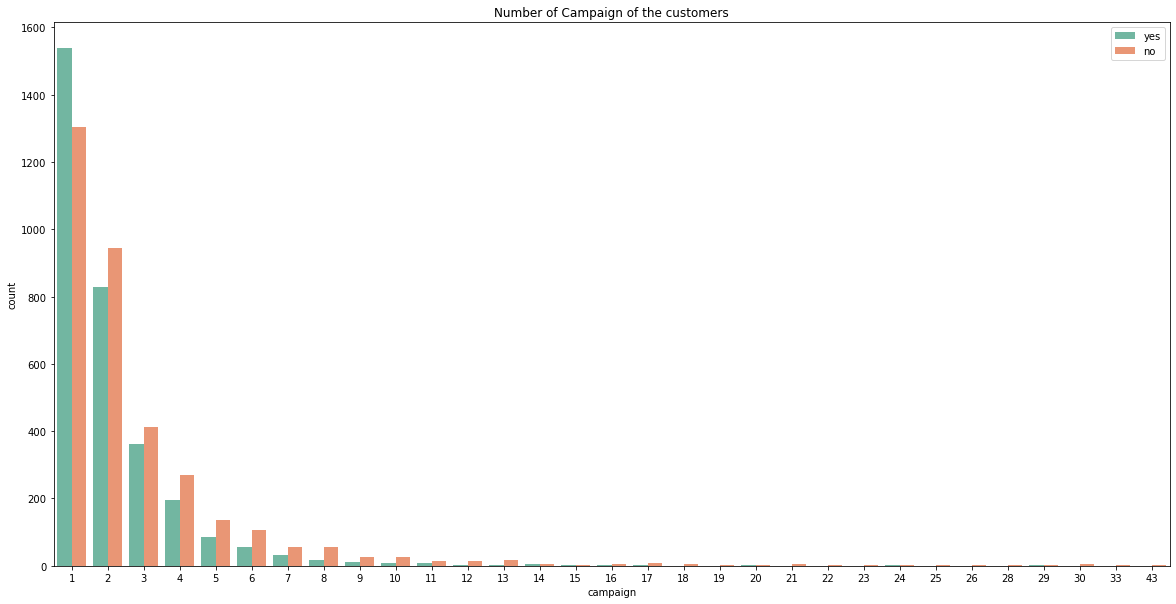

In [27]:
# Visualization of 'campaign'
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='campaign',hue='deposit',palette='Set2')
plt.title('Number of Campaign of the customers')
plt.legend(loc='upper right')
plt.show()

From the plot above, customers who are contacted more than once will like tend to not subscribe to our deposit product. This makes sense because they already think that it is enough to deposit to our product once and probably they will be annoyed if we always contact them. So, we better not to contact them if they have been contacted once. Later for the modeling, we will remove this feature because we cannot get this feature before the campaign.

## Categorical Features

### Feature: Job

In [28]:
# check the number of each value of job feature
df['job'].value_counts()/len(df)*100

management       22.766571
blue-collar      16.790535
technician       16.274837
admin.           12.240255
services          8.478690
retired           6.840589
self-employed     3.685727
student           3.443046
unemployed        3.352040
entrepreneur      2.988018
housemaid         2.441984
unknown           0.697710
Name: job, dtype: float64

We see that we have 0.6% unknown data, to impute this missing value, we will impute them with the mode of data which is `management`

In [29]:
# replace unknown with management
df['job']=df['job'].replace({'unknown':df['job'].mode().iloc[0]})

,job,percentage (%)
0,management,23.46
1,blue-collar,16.79
2,technician,16.27
3,admin.,12.24
4,services,8.48
5,retired,6.84
6,self-employed,3.69
7,student,3.44
8,unemployed,3.35
9,entrepreneur,2.99


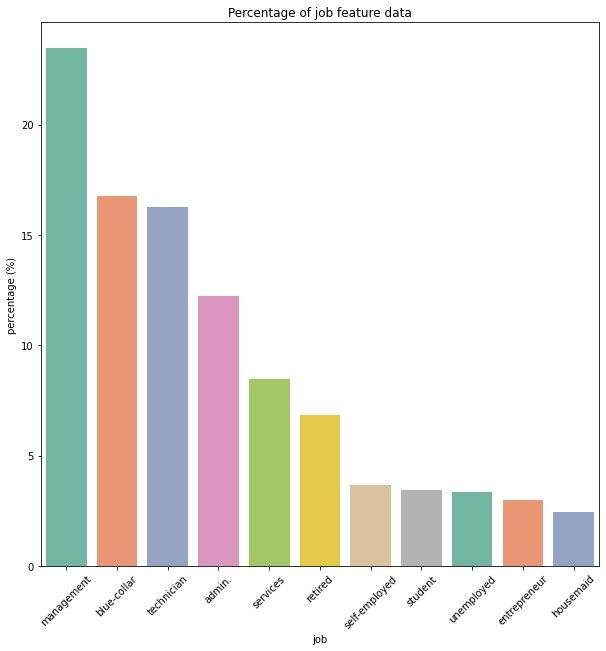

In [30]:
# our new data of job feature after impute the missing value
job_percent = pd.DataFrame(round(df['job'].value_counts()/len(df)*100,2)).reset_index().rename(columns={'index':'job','job':'percentage (%)'})
display(job_percent)


plt.figure(figsize=(10,10))
sns.barplot(y='percentage (%)',x='job',data=job_percent,palette='Set2')
plt.xticks(rotation=45)
plt.title("Percentage of job feature data")
plt.show()

We also want to know what job will subscribe to our deposit, so we can have a better insight about our customers deposit

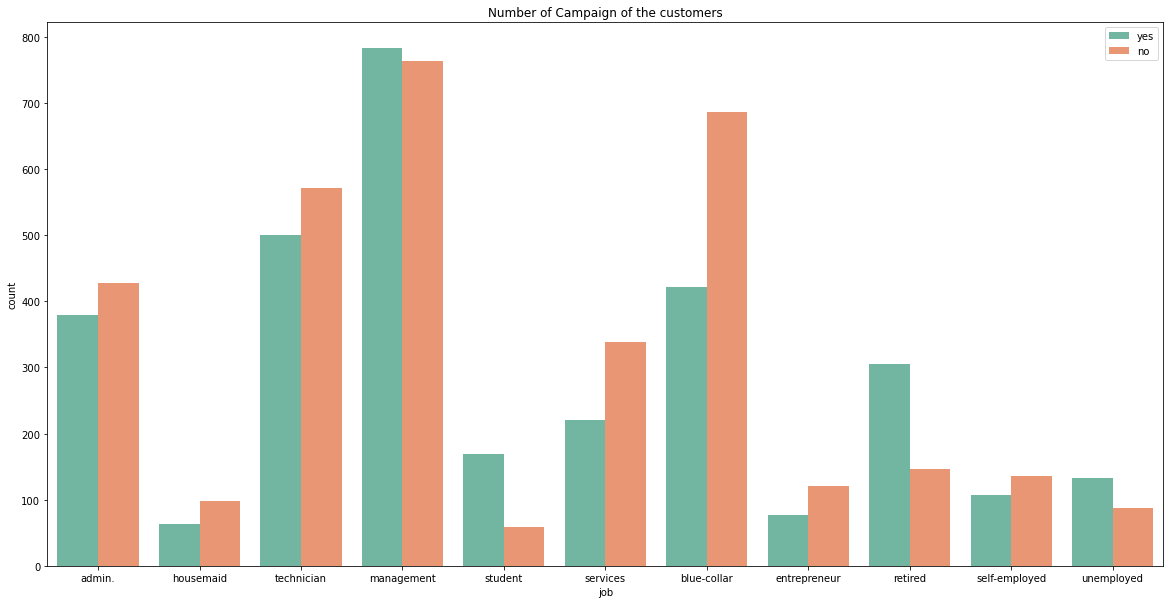

In [31]:
# Visualization of 'campaign'
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='job',hue='deposit',palette='Set2')
plt.title('Number of Campaign of the customers')
plt.legend(loc='upper right')
plt.show()

From the graph, we know that customers whose jobs are management, student, and retired will tend to subscribe to our deposit product. However, customers with management job will also likely not subscribe too. From this reason, we can focus on student and retired customers because the difference between subscribe and unsubscribe is relatively higher.

### Feature: Month

,month,percentage (%)
0,may,24.59
1,aug,14.33
2,jul,13.27
3,jun,11.03
4,apr,8.83
5,nov,7.86
6,feb,7.07
7,oct,3.78
8,jan,3.02
9,sep,2.87


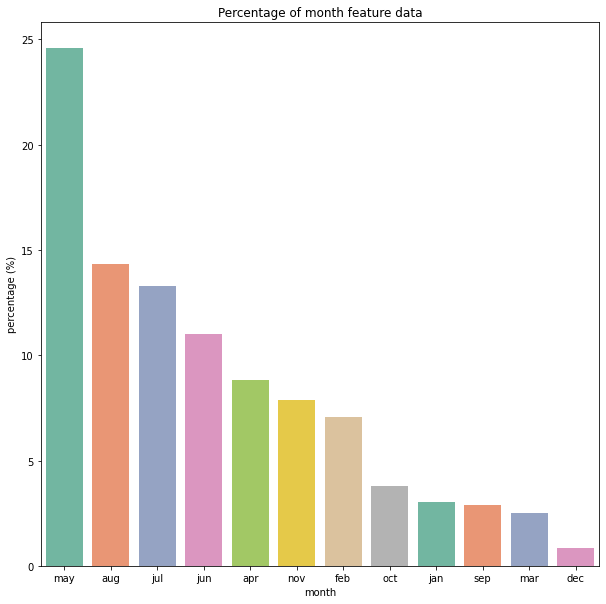

In [32]:
month_percent = pd.DataFrame(round(df['month'].value_counts()/len(df)*100,2)).reset_index().rename(columns={'index':'month','month':'percentage (%)'})
display(month_percent)

plt.figure(figsize=(10,10))
sns.barplot(y='percentage (%)',x='month',data=month_percent,palette='Set2')
# plt.xticks(rotation=45)
plt.title("Percentage of month feature data")
plt.show()

From the graph above, we know that in May has a lot of campaigns performed. We are curious if in May has many customers to subscribe to our deposit product.

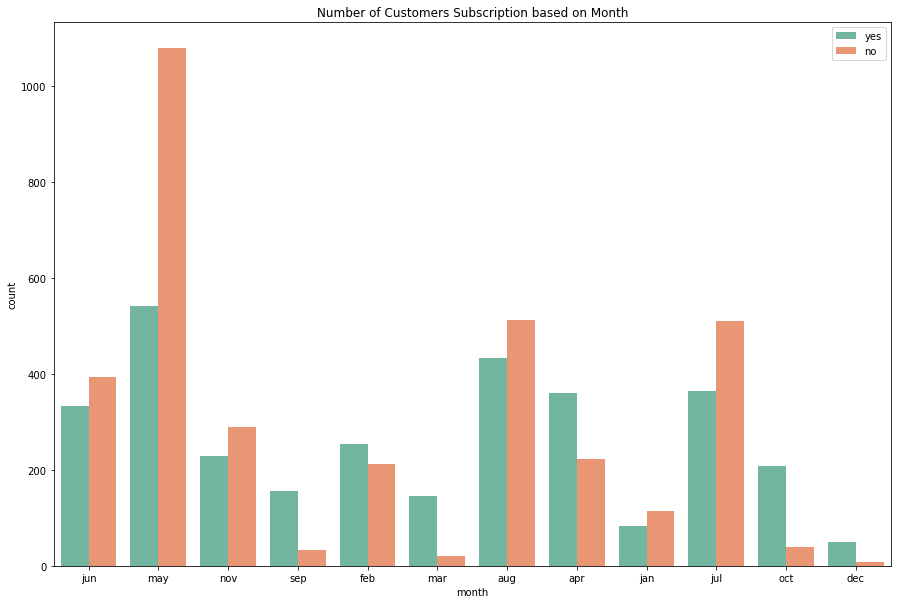

In [33]:
# Visualization of 'Month'
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='month',hue='deposit',palette='Set2')
plt.title('Number of Customers Subscription based on Month')
plt.legend(loc='upper right')
plt.show()

It turns out that in May doesn't give many customers to subscribe our deposit product,eventough in that month gives the highest number of customers. However, in February, April, September, October,and December also give better results, which we can see from the difference between the 'yes' and 'no' numbers. It is needed more investigation why in these months give us many customers. 

### Feature: Housing

,housing,percentage (%)
0,no,54.22
1,yes,45.78


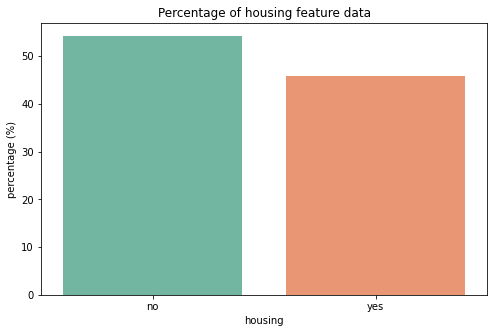

In [35]:
housing_percent = pd.DataFrame(round(df['housing'].value_counts()/len(df)*100,2)).reset_index().rename(columns={'index':'housing','housing':'percentage (%)'})
display(housing_percent)


plt.figure(figsize=(8,5))
sns.barplot(y='percentage (%)',x='housing',data=housing_percent,palette='Set2')
# plt.xticks(rotation=45)
plt.title("Percentage of housing feature data")
plt.show()

From the plot above, most of our customers don't have housing loan. We have an assumption that customers who don't have housing loan will tend to subscribe to our deposit product. To prove this, We need to see if these customers' subscription status.

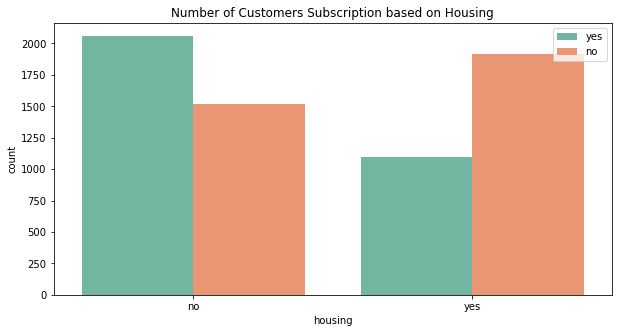

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='housing',hue='deposit',palette='Set2')
plt.title('Number of Customers Subscription based on Housing')
plt.legend(loc='upper right')
plt.show()

The plot above shows that our assumption is true. The customers who don't have housing loan will likely to subscribe to our deposit products and vice versa. We also see that customers who have housing loan susbcribe to our deposit product eventough the number is smaller dan no housing loan

### Feature: Loan


,loan,percentage (%)
0,no,87.47
1,yes,12.53


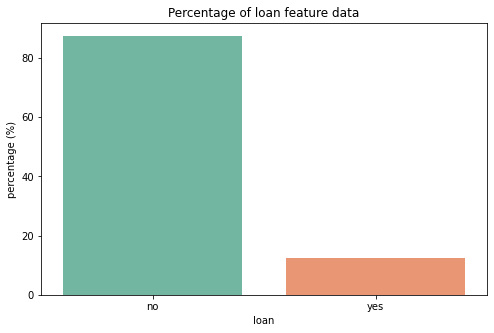

In [35]:
loan_percent = pd.DataFrame(round(df['loan'].value_counts()/len(df)*100,2)).reset_index().rename(columns={'index':'loan','loan':'percentage (%)'})
display(loan_percent)


plt.figure(figsize=(8,5))
sns.barplot(y='percentage (%)',x='loan',data=loan_percent,palette='Set2')
# plt.xticks(rotation=45)
plt.title("Percentage of loan feature data")
plt.show()

From the plot above, most of our customers don't have personal loan. We have an assumption that customers who don't have personal loan will tend to subscribe to our deposit product. To prove this, We need to see if these customers' subscription status.

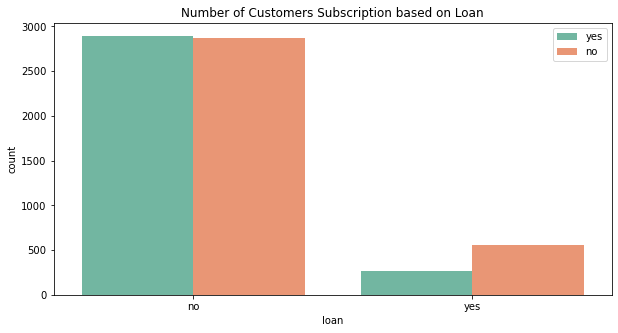

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='loan',hue='deposit',palette='Set2')
plt.title('Number of Customers Subscription based on Loan')
plt.legend(loc='upper right')
plt.show()

From the plot above, it seems like our assumption is right. However, customers who don't have personal loan also tend to unsubscribe to our deposit product. So, it is needed more invetigation why these customers don't want to subscribe to our deposit product.

### Feature: poutcome

In [37]:
poutcome_percent = pd.DataFrame(round(df['poutcome'].value_counts()/len(df)*100,2)).reset_index().rename(columns={'index':'poutcome','poutcome':'percentage (%)'})
display(poutcome_percent)

,poutcome,percentage (%)
0,unknown,73.93
1,failure,10.94
2,success,10.12
3,other,5.02


From the table above, we know that most of our customers poutcome status are unknown and few of them are labeled as other. To simplify this two labels, we will replace these with `nonexistent` because we literally don't what actually their status. 

,poutcome,percentage (%)
0,nonexistent,78.95
1,failure,10.94
2,success,10.12


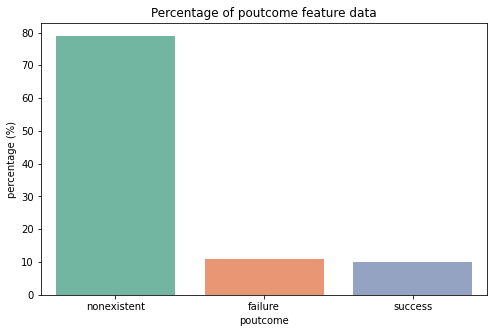

In [38]:
df['poutcome']=df['poutcome'].replace({'unknown':'nonexistent','other':'nonexistent'})
poutcome_percent_new = pd.DataFrame(round(df['poutcome'].value_counts()/len(df)*100,2)).reset_index().rename(columns={'index':'poutcome','poutcome':'percentage (%)'})
display(poutcome_percent_new)

plt.figure(figsize=(8,5))
sns.barplot(y='percentage (%)',x='poutcome',data=poutcome_percent_new,palette='Set2')
# plt.xticks(rotation=45)
plt.title("Percentage of poutcome feature data")
plt.show()

We also need to check the number of customers' subscription from this feature

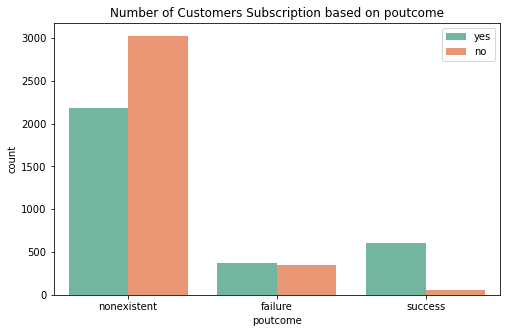

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='poutcome',hue='deposit',palette='Set2')
plt.title('Number of Customers Subscription based on poutcome')
plt.legend(loc='upper right')
plt.show()

We can tell from the plot that customers with success poutcome will susbcribe to our deposit product. It is also needed investigation on this nonexistent status that have some customers to subscribe to our deposit product. There is a possibility that these customers are actually labeled as success but the telemarketer forget to input/update/fill the poutcome status.

### Feature: Contact

In [40]:
contact_percent = pd.DataFrame(round(df['contact'].value_counts()/len(df)*100,2)).reset_index().rename(columns={'index':'contact','contact':'percentage (%)'})
display(contact_percent)

,contact,percentage (%)
0,cellular,72.62
1,unknown,20.54
2,telephone,6.84


From the table above, there are 20.54% customers whose contact is unknown. We will replace these values with the most frequent value in contact column which is `cellular`. Based on our knowledge, these days people are usually with their phones (cellular) rather than telephone. So, this will make sense if cellular numbers is higher than telephone numbers.

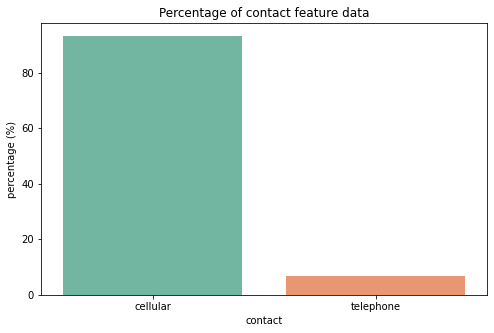

In [41]:
df['contact']=df['contact'].replace({'unknown':'cellular'})
contact_percent_new = pd.DataFrame(round(df['contact'].value_counts()/len(df)*100,2)).reset_index().rename(columns={'index':'contact','contact':'percentage (%)'})
# display(poutcome_percent_new)

plt.figure(figsize=(8,5))
sns.barplot(y='percentage (%)',x='contact',data=contact_percent_new,palette='Set2')
# plt.xticks(rotation=45)
plt.title("Percentage of contact feature data")
plt.show()

Next, we want to know customers' subscription from this feature. As we have learned before, we cannot directly believe that cellular contact will give us many customers. 

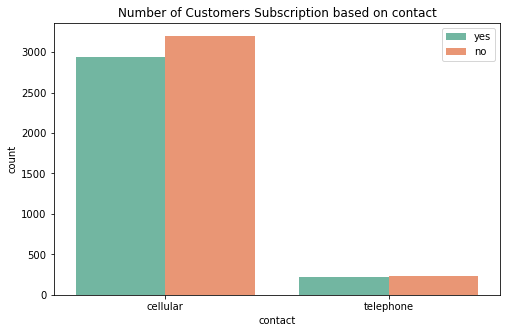

In [42]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='contact',hue='deposit',palette='Set2')
plt.title('Number of Customers Subscription based on contact')
plt.legend(loc='upper right')
plt.show()

The difference between subscribed and unsubscribed customers from cellular is relatively higher rather than from telephone. It makes sense since we contact our customers through cellular more, that's why we can see a significant difference of customers number. This plot also shows that the contact feature cannot literally tell the tendency of customers subscription. Even so, we still keep this feature for our modeling part.

In [43]:
# change the value of deposit into binary classes (1 for yes,0 for no)
df['deposit'] = np.where(df['deposit']=='yes',1,0)
df['deposit'].value_counts()

0    3433
1    3160
Name: deposit, dtype: int64

### Correlation

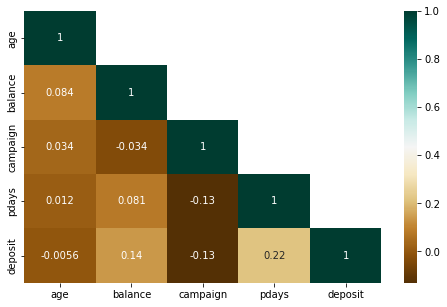

In [44]:
mask = np.triu(df.corr(method='spearman'),1)
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap='BrBG',mask=mask)
plt.show()

from the correlation plot above, we notice that `balance`, `campaign`, and `pdays`correlation with `deposit`. However, we will remove campaign because this feature is not obtained before the campaign.  

In [45]:
# current dataset dimension
print(f"After dropping outliers, we have {df.shape[0]} rows and {df.shape[1]} columns")

After dropping outliers, we have 6593 rows and 12 columns


## Current Conclusion

1. From our cleaned dataset, now our `age` customers range from 18-95 years old and customers' `balance` range from 0-4017 EUR.
2. Our customers tend to deposit if they are contacted only once, if we contact them more than once, they possibly will not subscribe to our deposit product. Also, if they are never contacted before (based on `pdays` feature), they also tend to subscribe.
3. Most customers who subscribe the deposit products whose jobs are management, student, and retired. We should expand our approach to student and retired customers because we have too much approached on management customers. 
4. The optimal months to contact our customers are in Febrary, April, September, October, and December.
5. Most of our customers who subscribe to our deposit product are the ones who don't have housing loan and personal loan.
6. Customers whose poutcome status is success also will subscribe to our deposit product.
7. Contact feature doesn't give any insights about our customers' subscription. However, we will keep this feature for modeling process
8. `campaign` feature will not be used from modeling because this feature is not obtained before campaign
9. Our data is balanced. So for the modeling we don't have to do data balancing.


In [46]:
df.drop(columns=['age_group','campaign'],inplace=True)
print(f"After dropping campaign feature and age group, we have {df.shape[0]} rows and {df.shape[1]} columns")

After dropping campaign feature and age group, we have 6593 rows and 10 columns


## Modeling

In this part, we will do our modeling for the dataset. The steps are:
- Data Preprocessing
    - Data splitting (train and test set)
    - Data Encoding and Scaling
- Modeling
    - Cross Validation of Benchmark Models
    - Predict to Test Set
    - Choose Best 3 models based on the performance score (accuracy and ROC AUC)
    - Hyperparameter Tuning the 3 models
    - Predict to Test set and calculate the marketing cost
- Choose the best model with the lowest marketing cost
- Recommendation

## Data Preprocessing

### Data Splitting

In [48]:
# define X and y
X = df.drop(columns=['deposit'])
y = df['deposit']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)

In [50]:
display(X_train,X_test,y_train,y_test)

,age,job,balance,housing,loan,contact,month,pdays,poutcome
2429,48,management,268,yes,no,cellular,jul,0,nonexistent
3490,59,management,893,yes,no,cellular,apr,0,nonexistent
0,55,admin.,1662,no,no,cellular,jun,0,nonexistent
4977,35,technician,3549,yes,no,cellular,aug,0,nonexistent
5297,30,management,536,no,no,cellular,jul,0,nonexistent
...,...,...,...,...,...,...,...,...,...
62,44,blue-collar,2,no,yes,telephone,jul,0,nonexistent
404,33,blue-collar,863,yes,no,telephone,may,0,nonexistent
4246,40,admin.,355,yes,no,cellular,apr,138,nonexistent
642,55,technician,462,no,no,cellular,aug,0,nonexistent


,age,job,balance,housing,loan,contact,month,pdays,poutcome
4498,28,technician,631,no,no,cellular,apr,0,nonexistent
3129,54,admin.,200,no,no,cellular,jun,0,nonexistent
780,36,technician,125,yes,no,cellular,may,0,nonexistent
2377,30,management,135,no,no,cellular,aug,0,nonexistent
1762,35,blue-collar,625,no,no,cellular,may,0,nonexistent
...,...,...,...,...,...,...,...,...,...
1894,35,unemployed,2080,yes,no,telephone,apr,0,nonexistent
3158,19,student,394,no,no,cellular,apr,0,nonexistent
6102,37,admin.,245,yes,yes,cellular,may,0,nonexistent
5484,76,retired,1492,no,no,telephone,nov,0,nonexistent


2429    1
3490    0
0       1
4977    0
5297    1
       ..
62      0
404     1
4246    0
642     0
3479    1
Name: deposit, Length: 5274, dtype: int32

4498    0
3129    1
780     1
2377    0
1762    0
       ..
1894    0
3158    1
6102    1
5484    1
5909    1
Name: deposit, Length: 1319, dtype: int32

### Data Encoding & Scaling

In this section, I will encode the features as follows:
- OneHotEncoder = `loan`, `housing`,`contact`,`poutcome`. This is done because the unique values of these features are only 2-3 values. So, it will be more effiecient if I encode these features with OneHotEncoder
- BinaryEncoder = `job`,`month`. This is done because their unique vales are more than 3 values. Eventough this feature will hard to explain, but at least it will make the computation faster.
- StandardScaler = This scaling feature is used to scale the numeric features. This scaler standardizes a feature by substracting the mean and then scaling to unit variance. The feature `age` and `balance` will be scaled by this.

In [52]:
data_transformer = ColumnTransformer([
    ('onehot',OneHotEncoder(),['loan','housing','contact','poutcome']),
    ('binary',BinaryEncoder(),['job','month'])
],remainder='passthrough')
data_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(),
                                 ['loan', 'housing', 'contact', 'poutcome']),
                                ('binary', BinaryEncoder(), ['job', 'month'])])

In [53]:
standard = StandardScaler()

### Define Benchmark Model

To obtain the best model, we will compare these classification models to know what model perform the best. There are KNN, Logistic Regression, Decision Tree, Random Forest, Ada Boost, Gradient Boost, and XGB.

In [65]:
knn = KNeighborsClassifier()
logreg = LogisticRegression(random_state=42)
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
ada = AdaBoostClassifier(random_state=42)
gradient = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

In [57]:
# !pip install lightgbm

**Cross Validation**

Cross Validation is performed to avoid overfitting of a model and determine what models have good performances based on the mean and standard value. Cross Validation is a resampling method that uses different portions of the data to test and train a model on different iterations.

A good model will give a high mean and low standard deviation, and the metrics scores are consistent.

In [80]:
model = [knn, logreg, tree, rf, ada, gradient, xgb]

cv_mean_roc_auc = []
cv_std_roc_auc = []

for i in model:

    pipe_model = Pipeline([
        ('transform',data_transformer),
        ('scaling',standard),
        ('model',i)
    ])

    model_cv = cross_val_score(
        estimator=pipe_model,
        X = X_train,
        y = y_train,
        cv = 5,
        scoring='roc_auc'
        )

    print(model_cv,i)
    cv_mean_roc_auc.append(model_cv.mean())
    cv_std_roc_auc.append(model_cv.std())

[0.71535382 0.68117562 0.70158103 0.71249325 0.69632455] KNeighborsClassifier()
[0.72992217 0.71091888 0.7449477  0.73727093 0.71926996] LogisticRegression(random_state=42)
[0.59780629 0.57271395 0.63158492 0.60719532 0.62212303] DecisionTreeClassifier(random_state=42)
[0.74325039 0.71938199 0.7293768  0.72543834 0.72671644] RandomForestClassifier(random_state=42)
[0.73130809 0.71197722 0.73162847 0.73780018 0.73601327] AdaBoostClassifier(random_state=42)
[0.74192927 0.74212726 0.74917385 0.74987939 0.75232556] GradientBoostingClassifier(random_state=42)
[0.73651159 0.70681872 0.72408871 0.7209649  0.72474346] XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3000

In [69]:
train_benchmark_roc_auc  = pd.DataFrame({
    'models':['KNN','Logreg','Decision Tree','Random Forest','Ada Boost','Gradient Boost','XGB'],
    'mean_roc_auc':cv_mean_roc_auc,
    'std_roc_auc':cv_std_roc_auc
})

In [128]:
print('Train Benchmark Performance Score')
display(train_benchmark_roc_auc)

Train Benchmark Performance Score


,models,mean_roc_auc,std_roc_auc
0,KNN,0.701386,0.012269
1,Logreg,0.728466,0.012196
2,Decision Tree,0.606285,0.020448
3,Random Forest,0.728833,0.007918
4,Ada Boost,0.729745,0.009229
5,Gradient Boost,0.747087,0.004261
6,XGB,0.722625,0.009509


### Predict to test set

In [129]:
# from sklearn.metrics import roc_auc_score
model = [knn, logreg, tree, rf, ada, gradient, xgb]
precision_scores_list = []
roc_auc_list = []

for i in model :
    pipe_model = Pipeline([
        ('transform',data_transformer),
        ('scaling',standard),
        ('model',i)
    ])

    pipe_model.fit(X_train,y_train)
    # y_pred_benchmark=pipe_model.predict(X_test)
    y_pred_benchmark_proba = pipe_model.predict_proba(X_test)[:,1]

    # precision_scores_list.append(precision_score(y_test,y_pred_benchmark))
    roc_auc_list.append(roc_auc_score(y_test,y_pred_benchmark_proba))
test_benchmark  = pd.DataFrame({
    'model':['KNN','Logreg','Decision Tree','Random Forest','Ada Boost','Gradient Boost','XGB'],
    'roc-auc score':roc_auc_list
    
})
print('Test Benchmark Performance Model')
test_benchmark

Test Benchmark Performance Model


,model,roc-auc score
0,KNN,0.699620
1,Logreg,0.704710
2,Decision Tree,0.606981
3,Random Forest,0.721899
4,Ada Boost,0.718752
5,Gradient Boost,0.739863
6,XGB,0.707730


From the cross validation on 7 models, we have our top models based on ROC-AUC score and precision score: Gradient Boost and Ada Boost. Therefore, we are going to choose Ranfom Forest, Gradient Boost and Ada Boost to enhance their performance by tuning then we also calculate the cost based on FP and FN score.

## Cost Marketing Calculation

Before we are doing hyperparameter tuning and predict to the new tuned models, we need to calculate the marketing cost if no model applied to the case. To do that, we simulate two cases: 
- if customers where considered subscribed to the deposit product but actually don't subscribe to the deposit product
- if customers where considered not subscribed to the deposit product but actually subscribe to the deposit product

Then, we calculate the cost of FP and FN based the information mentioned and compare which total cost will more costly. We want to prove that our stance about the first case will more costly. To do this, we combine the calculation from [[2]](https://github.com/goncaloggomes/cost-prediction/blob/master/ML_fullproject_bankmktcampaign.ipynb) and [[3]](https://www.kdnuggets.com/2018/10/confusion-matrices-quantify-cost-being-wrong.html) and modify them based on our dataset.

In [72]:
# if customers where considered subscribed to the deposit product but actually don't subscribe to the deposit product
y_pred_all_good = np.ones(y_test.shape)
y_pred_all_good

array([1., 1., 1., ..., 1., 1., 1.])

In [137]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_all_good).ravel()
fp_before = fp/y_test.shape[0]
fn_before = fn/y_test.shape[0]
cost_before = fp_before*2000+fn_before*500
print(f"The marketing cost before model is applied to our dataset is {round(cost_before,2)} EUR average for each customer if customers where considered subscribed to the deposit product but actually don't subscribe to the deposit product")

The marketing cost before model is applied to our dataset is 1041.7 EUR average for each customer if customers where considered subscribed to the deposit product but actually don't subscribe to the deposit product


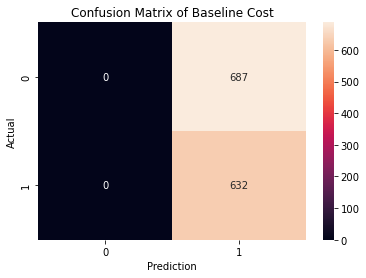

In [159]:
sns.heatmap(confusion_matrix(y_test,y_pred_all_good),annot=True,fmt='g')
plt.title('Confusion Matrix of Baseline Cost')
plt.xlabel('Prediction')
plt.ylabel('Actual');

In [74]:
#if customers where considered not subscribed to the deposit product but actually subscribe to the deposit product

y_pred_all_bad = np.zeros(y_test.shape)
y_pred_all_bad

array([0., 0., 0., ..., 0., 0., 0.])

In [130]:
tn,fp,fn,tp = confusion_matrix(y_test,y_pred_all_bad).ravel()
fp_bad = fp/y_test.shape[0]
fn_bad = fn/y_test.shape[0]
cost_before = fp_bad*2000+fn_bad*500
print(f"The cost before model is applied to our dataset is {round(cost_before,2)} EUR average per customer if customers where considered not subscribed to the deposit product but actually subscribe to the deposit product")

The cost before model is applied to our dataset is 239.58 EUR average per customer if customers where considered not subscribed to the deposit product but actually subscribe to the deposit product


From our observation below, we know that customers where considered subscribed to the deposit product but actually don't subscribe to the deposit product will more expensive. It proves our problem statement. Next step is we will look for the models who can lower the False Positive numbers so that we can find the most efficient marketing cost.

## Hyperparameter Tuning

Hyperparameter tuning is done to enhance our model performance. 

### Function for hyperparameter tuning model

In [83]:
def random_search(model, parameter):
    print(f"Hyperparameter tuning process")
    random_search = RandomizedSearchCV(model,
                    param_distributions=parameter, 
                    cv=5, 
                    scoring='roc_auc',
                    n_iter=100,
                    random_state=42,
                    n_jobs=-1,
                    error_score='raise'
                    )
                    
    random_search.fit(X_train,y_train)

    print(f'Best ROC-AUC score:{random_search.best_score_}')
    print(f'Best Parameters:{random_search.best_params_}')

    return random_search.best_estimator_


### Function for predicting to test set and cost calculation

In [142]:
def prediction_cost_calc(model):
    y_pred_tuned = model.predict(X_test)
    y_pred_tuned_proba = model.predict_proba(X_test)[:,1]
    # accuracy_score_test = accuracy_score(y_test,y_pred_tuned)
    roc_auc_score_test_2 = roc_auc_score(y_test,y_pred_tuned_proba)
    precision_score_test = precision_score(y_test,y_pred_tuned)
    # print(f"The best Precision score: {precision_score_test}")
    print(f"The best ROC-AUC score: {roc_auc_score_test_2}")
    
    print(classification_report(y_test,y_pred_tuned))

    sns.heatmap(confusion_matrix(y_test,y_pred_tuned),annot=True,fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')

    tn,fp,fn,tp = confusion_matrix(y_test,y_pred_tuned).ravel()
    fp = fp/y_test.shape[0]
    fn = fn/y_test.shape[0]
    # fp_reduction = fp_good-fp
    # fn_reduction = fn_good-fn
    cost_model = fn*500+fp*2000
    # cost_reduction = 500*fn_reduction+fp_reduction*2000
    cost_reduction = cost_before-cost_model
    diff = round(cost_reduction/cost_before*100,2)
    print(f"the marketing cost by model is {round(cost_model,2)} EUR average per customer")
    print(f"the cost difference by model is {round(cost_reduction,2)} EUR average savings per customer")
    print(f"Cost Reduction from the cost without model is {diff}%")
    # return roc_auc_score_test_2


**Random Forest**

Random Forest is an ensemble model that built from many decision tree models. For the classification cases, the output of this model is the class selected by most trees (majority voting). This model avoids the overfitting which is usually done by one decision tree. The technique of this model is Bagging. 

In [133]:
rf_parameter ={
    'method__bootstrap': [True, False],
    'method__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'method__min_samples_leaf': [1, 2, 4],
    'method__min_samples_split': [2, 5, 10],
    'method__n_estimators': np.arange(100,500,100),
    'scaler':[standard]
}

# skfold = StratifiedKFold()

pipe_model_rf = Pipeline([
        ('transform',data_transformer),
        ('scaler',standard),
        ('method',rf)])

In [99]:
rf_random = random_search(pipe_model_rf,rf_parameter)

Hyperparameter tuning process
Best ROC-AUC score:0.7547888602402649
Best Parameters:{'scaler': StandardScaler(), 'method__n_estimators': 200, 'method__min_samples_split': 10, 'method__min_samples_leaf': 4, 'method__max_depth': 60, 'method__bootstrap': True}


The best ROC-AUC score: 0.7437538002321596
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       687
           1       0.73      0.57      0.64       632

    accuracy                           0.69      1319
   macro avg       0.70      0.69      0.69      1319
weighted avg       0.70      0.69      0.69      1319

the marketing cost by model is 304.02 EUR average per customer
the cost difference by model is 737.68 EUR average savings per customer
Cost Reduction from the cost without model is 70.82%


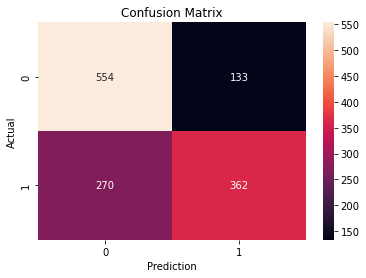

In [143]:
prediction_cost_calc(rf_random)

**Ada Boost**

AdaBoost is an ensemble model that combines weak learner. The most common algorithm used with AdaBoost is decision trees with one level (one split). These trees are also called Decision Stumps. The way of this algorithm works is building a model and gives weights to all the data points. Then, it assigns higher weights to points that are wrongly classified. Now, all the points which have higher weights are given more importance in the next model. It will keep training models untul and unless a low error is achieved. This model can be susceptible to the overfitting than other learning algorithms.

In [85]:
### hyperparameter tuning : Adaboost
pipe_model_ada = Pipeline([
        ('transform',data_transformer),
        ('scaler',standard),
        ('method',ada)])
        
ada_parameter ={
    'method__n_estimators': np.arange(2,102,2),
    'method__learning_rate': [0.0001,0.001,0.01,0.1,1],
    'scaler':[standard]
}

In [86]:
ada_random = random_search(pipe_model_ada,ada_parameter)

Hyperparameter tuning process
Best ROC-AUC score:0.7321735490156287
Best Parameters:{'scaler': StandardScaler(), 'method__n_estimators': 96, 'method__learning_rate': 0.1}


The best ROC-AUC score: 0.72823733716581
              precision    recall  f1-score   support

           0       0.65      0.81      0.73       687
           1       0.72      0.53      0.61       632

    accuracy                           0.68      1319
   macro avg       0.69      0.67      0.67      1319
weighted avg       0.69      0.68      0.67      1319

the marketing cost by model is 306.29 EUR average per customer
the cost difference by model is 735.41 EUR average savings per customer
Cost Reduction from the cost without model is 70.6%


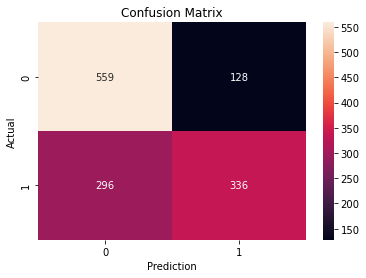

In [144]:
prediction_cost_calc(ada_random)

**Gradient Boost**

Gradient Boost is an ensemble method that combines many weak learners to come up with one strong learner. The weak learners are individual decision trees, just like Ada Boost. The algorithm works by fitting the residual/wrong samples from the previous step so as the model improves. The final model aggregates the result of each step and thus a strong learner is achieved.


In [90]:
pipe_model_gradient= Pipeline([
        ('transform',data_transformer),
        ('scaler',standard),
        ('method',gradient)])

gradient_parameter ={
    'method__n_estimators':np.arange(100,500,100), 
    'method__learning_rate': [0.0001,0.001,0.01, 0.1, 1.0],
    'method__max_depth':np.arange(5,16,2),
    'method__min_samples_split':np.arange(200,1001,200),
    'method__min_samples_leaf':np.arange(30,71,10),
    'scaler':[standard]
}


In [145]:
gradient_random = random_search(pipe_model_gradient,gradient_parameter)

Hyperparameter tuning process
Best ROC-AUC score:0.7511258979354815
Best Parameters:{'scaler': StandardScaler(), 'method__n_estimators': 400, 'method__min_samples_split': 200, 'method__min_samples_leaf': 70, 'method__max_depth': 11, 'method__learning_rate': 0.01}


The best ROC-AUC score: 0.7391820057855656
              precision    recall  f1-score   support

           0       0.67      0.84      0.74       687
           1       0.76      0.55      0.64       632

    accuracy                           0.70      1319
   macro avg       0.71      0.69      0.69      1319
weighted avg       0.71      0.70      0.69      1319

the marketing cost by model is 276.72 EUR average savings per customer
the cost difference by model is 764.97 EUR average savings per customer
Cost Reduction from the cost without model is 73.44%


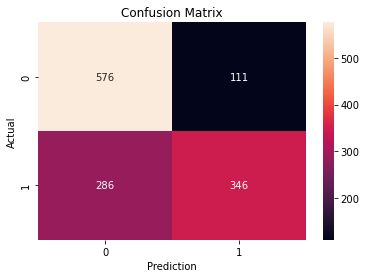

In [141]:
prediction_cost_calc(gradient_random)

**ROC-AUC**

ROC-AUC is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR (True Positive Rate) against FPR (False Positive Rate) at various threshold. The Area Under the Curve is the measure of the abality of a classifier to distinguish between classes and is used as a summary of the ROC Curve.

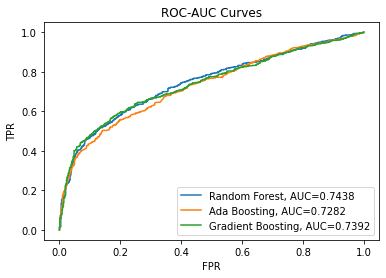

In [160]:
#set up plotting area
plt.figure(0).clf()

#fit random forest model and plot ROC curve
model = rf_random
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit ada boost model and plot ROC curve
model = ada_random
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Ada Boosting, AUC="+str(auc))

#fit gradient boost model and plot ROC curve
model = gradient_random
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = round(roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.title('ROC-AUC Curves')
plt.show()

In [146]:
print(f"Total cost average before model applied: {round(cost_before,2)} EUR")
pd.DataFrame({
    'Model':['Random Forest','Ada Boost','Gradient Boost'],
    'Total Cost Avg (EUR)':[304.02,306.29,276.72],
    'Cost Saving avg (EUR)':[737.68,735.41,764.97],
    'Cost Reduction (%)': [70.82,70.6,73.44],
    'ROC-AUC score (%)':[0.74*100,0.7282*100,0.739*100]
})

Total cost average before model applied: 1041.7 EUR


,Model,Total Cost Avg (EUR),Cost Saving avg (EUR),Cost Reduction (%),ROC-AUC score (%)
0,Random Forest,304.02,737.68,70.82,74.00
1,Ada Boost,306.29,735.41,70.60,72.82
2,Gradient Boost,276.72,764.97,73.44,73.90


From the hyperparameter tuning and prediction of marketing cost calculation above, we got Gradient Boost as our best model to predict the cost effieciency. Gradient Boost shows that its total cost is the lowest with the highest cost saving. It seems like best ROC-AUC score is Random Forest model, but the cost calculation from the model is not as good as Gradient Boost. In this case, we try to lower the FP numbers and we know that it is better to use Precision as our metrics. We get the best score but since our data is quite balanced, we are not sure that using precision as main metrics will be good enough. To overcome with this, we only care about the confusion matrix that each model produces and our main goal of doing prediction is to lower the FP number.

We use ROC-AUC metrics to only see how good our models to distinguish between positive and negative classes. Based on this [source](https://github.com/goncaloggomes/cost-prediction/blob/master/ML_fullproject_bankmktcampaign.ipynb), with the academic scoring system as

- 0.9 - 1 = excellent (A)
- 0.8 - 0.9 = Good (B)
- 0.7 - 0.8 = reasonable (C)
- 0.6 - 0.7 = weak (D)
- 0.5 - 0.6 = terrible (E)

Overall, our models' ROC-AUC score are at reasonable level, meaning that our models can classify the positive classes and negative classes.

## Feature Importances

In this section, we will get what features are most relevant to our deposit prediction.

In [102]:
onehot = list(data_transformer.transformers_[0][1].get_feature_names_out())
onehot

['loan_no',
 'loan_yes',
 'housing_no',
 'housing_yes',
 'contact_cellular',
 'contact_telephone',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [103]:
binary = data_transformer.transformers_[1][1].get_feature_names()
binary

['job_0',
 'job_1',
 'job_2',
 'job_3',
 'month_0',
 'month_1',
 'month_2',
 'month_3']

In [104]:
num_feat = list(X_train.iloc[:,data_transformer.transformers_[2][2]])
num_feat

['age', 'balance', 'pdays']

In [105]:
feature_name = onehot+binary+num_feat
len(feature_name)

20

In [123]:
gradient_random[2]

GradientBoostingClassifier(learning_rate=0.01, max_depth=11,
                           min_samples_leaf=70, min_samples_split=200,
                           n_estimators=400, random_state=42)

In [124]:
len(gradient_random[2].feature_importances_)

20

In [125]:
feature_imp = pd.DataFrame({
    'features':feature_name,
    'importance':gradient_random[2].feature_importances_
})
feature_imp.sort_values(by='importance',ascending=False)
# feature importance

,features,importance
8,poutcome_success,0.269042
18,balance,0.146254
17,age,0.129502
19,pdays,0.086909
15,month_2,0.066760
16,month_3,0.059672
3,housing_yes,0.053502
2,housing_no,0.038541
13,month_0,0.037993
10,job_1,0.022913


''

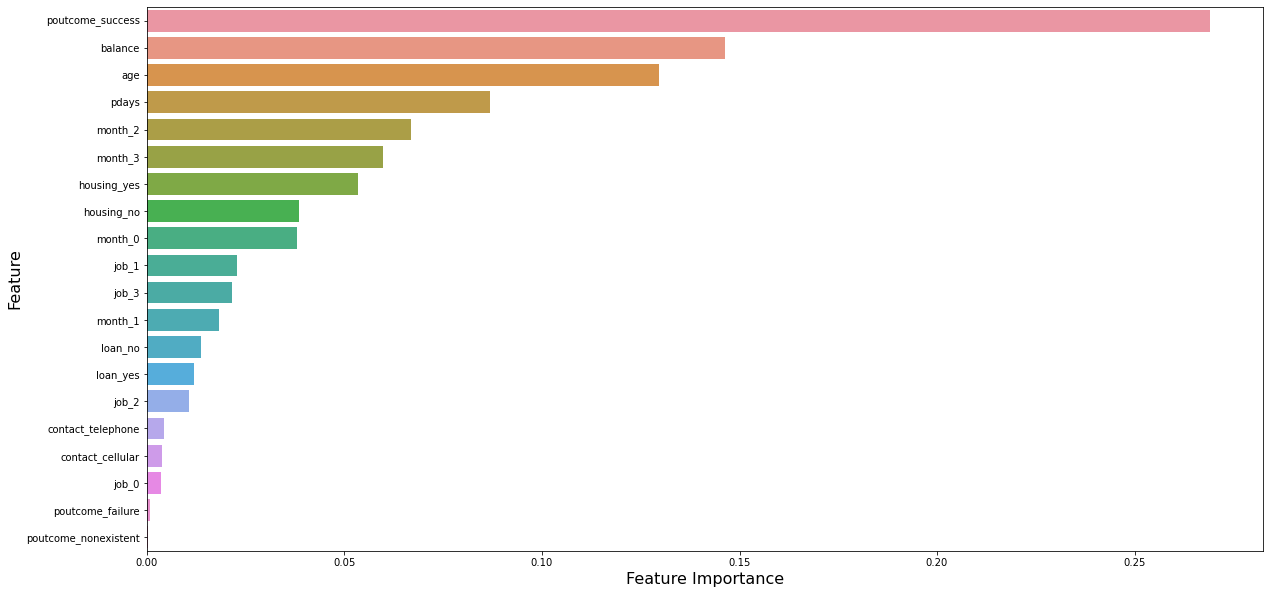

In [126]:
plt.figure(figsize=(20,10))
sns.barplot(data=feature_imp.sort_values(by='importance',ascending=False),y='features',x='importance')
# plt.xticks(rotation=90)
plt.xlabel('Feature Importance',fontsize=16)
plt.ylabel('Feature',fontsize=16)
;

From the feature importance graph above, we can tell factors that give impact to the model is when `poutcome status`, `age`, and `balance`. At least, we already know that `balance` does has correlation with deposit eventough it is a weak correlation.

## Final conclusion

**Marketing Cost Efficiency**

Based on our modeling, we have compared Gradient boost and Ada Boost models. Our goal here is to reduce FP number since its consequence is costly to the bank. So, we compared the models also with the confusion matrix to obtain the FP and FN results based on the models. The results show that Gradient Boost is the best performance with this dataset because it has the lowest total marketing cost (276.62 EUR) and highest saving cost (764.97 EUR) from the baseline total cost 1401.7 EUR.

**Recommendation**

Things that should be prioritized by the bank:
- Target the deposit product to wider prospective customers such as students and retired customers, since the marketing team doesn't contact them much. If we still approach management customers, the chance of not getting new subscribers is higher because from our dataset, the difference between no deposit vs deposit of management customers is relatively small.
- Based on our data, the customers who don't have housing loan and with relatively high balance also will tend to subscribe to our deposit product.
- The campaign might be better in February, April, September, October,and December since the in those month we can get many customers to subscribe the deposit product.
- The customers that have high balance and the the poutcome is success will tend to subscribe the deposit
- Having a questionnaire after contacting the customers is a good way to know our customers so that we can get better insights about our customers and better prediction.

## Save Model

In [332]:
gradient_random

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['loan', 'housing', 'contact',
                                                   'poutcome']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'month'])])),
                ('scaler', StandardScaler()),
                ('method',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=11,
                                            min_samples_leaf=70,
                                            min_samples_split=200,
                                            n_estimators=400))])

In [148]:
import pickle

In [149]:
filename = 'best_model_gb.sav'

pickle.dump(gradient_random,open(filename,"wb"))

In [150]:
# load model
filename='best_model_gb.sav'

# perintah untuk load model
loaded_model = pickle.load(open(filename,"rb"))

### Simulation to use the model

In [165]:
dummy3 = pd.DataFrame({
    'age':[40],
    'job':['management'],
    'balance':[2000],
    'housing':['no'],
    'loan':['no'],
    'contact':['cellular'],
    'month':['oct'],
    'pdays':[100],
    'poutcome':['success']
})
dummy3

,age,job,balance,housing,loan,contact,month,pdays,poutcome
0,40,management,2000,no,no,cellular,oct,100,success


In [162]:
print(loaded_model.predict(dummy3))
print(loaded_model.predict_proba(dummy3))

[1]
[[0.24387736 0.75612264]]


it shows that customer with criteria :
- age: 40
- job: management
- balance : 2000
- housing: no
- loan: no
- contact: cellular
- month: oct
- pdays: 100
- poutcome: success

will likely to subscribe to our deposit product with the probability around 75.6%

## References
- [1](https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset) Bank Marketing Dataset
- [2](https://github.com/goncaloggomes/cost-prediction/blob/master/ML_fullproject_bankmktcampaign.ipynb) Goncalo Gomes's Repository
- [3](https://www.kdnuggets.com/2018/10/confusion-matrices-quantify-cost-being-wrong.html) KDNuggets article: Using Confusion Matrices to Quantify the Cost of Being Wrong
- [4](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) Towards Data Science article : Scale, Standardize, or Normalize with Scikit-Learn
- [5](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#:~:text=Cross%2Dvalidation%20is%20a%20resampling,model%20will%20perform%20in%20practice.) Wikipedia: Cross Validation
- [6](https://en.wikipedia.org/wiki/Random_forest) Wikipedia: Random Forest
- [7](https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/) Analytics Vidhya article : AdaBoost Algorithm – A Complete Guide for Beginners
- [8](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) Analytics Vidhta article: Complete Machine Learning Gudie to Parameter Tuning in Gradient Boosting (GBM) in Python